In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [2]:
#Read input file and understand the data
germanc_df = pd.read_csv('german_credit.csv')
germanc_df.shape
# "default" is my dependent variable

(1000, 21)

In [3]:
germanc_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [4]:
germanc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [5]:
col_names = ['default','account_check_status','duration_in_month','credit_history','purpose','credit_amount','savings','present_emp_since','installment_as_income_perc','personal_status_sex','other_debtors','present_res_since','property','age','other_installment_plans','housing','credits_this_bank','job','people_under_maintenance','telephone','foreign_worker']

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [6]:
for features in germanc_df.columns: # Loop through all columns in the dataframe
    if germanc_df[features].dtypes == 'object': # Only apply for columns with objects
        temp = pd.get_dummies(germanc_df[features],prefix=features,drop_first=True) #get dummies for each feature and drop the first dummy
        germanc_df=germanc_df.join(temp)

In [7]:
germanc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
default                                                                       1000 non-null int64
account_check_status                                                          1000 non-null object
duration_in_month                                                             1000 non-null int64
credit_history                                                                1000 non-null object
purpose                                                                       1000 non-null object
credit_amount                                                                 1000 non-null int64
savings                                                                       1000 non-null object
present_emp_since                                                             1000 non-null object
installment_as_income_perc                                                    1000 non-null int64
persona

In [8]:
#Print the shape of the model data
germanc_df.shape

(1000, 62)

### Check for highly correlated variables but don't required any treatment for this use case

In [9]:
# Create correlation matrix
corr_matrix = germanc_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
germanc_df.drop(to_drop, axis=1,inplace=True)

In [10]:
germanc_df.shape

(1000, 62)

### Drop the original variables which are converted to dummy

In [11]:
for column in germanc_df.columns:
    if germanc_df[column].dtypes=='object':
        germanc_df.drop(labels=column,axis=1,inplace=True)

In [12]:
germanc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
default                                                                       1000 non-null int64
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
people_under_maintenance                                                      1000 non-null int64
account_check_status_< 0 DM                                                   1000 non-null uint8
account_chec

In [13]:
germanc_df.shape

(1000, 49)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [14]:
train_char_label = ['No', 'Yes']

In [15]:
from sklearn.model_selection import train_test_split

seed=7

X =  germanc_df.drop("default", axis=1)
y =  germanc_df.pop("default")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 500,n_jobs=2,criterion="entropy",random_state=9999)
rfcl = rfcl.fit(X_train, y_train)

In [17]:
test_pred = rfcl.predict(X_test)

In [18]:
rfcl.score(X_test , y_test)

0.79

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

conf_matrix = confusion_matrix(y_test,test_pred)

model_score=accuracy_score(y_test,test_pred)

print("The Accuracy score is : ",model_score,"\nThe Confusion Matrix is :\n",conf_matrix)

The Accuracy score is :  0.79 
The Confusion Matrix is :
 [[202  15]
 [ 48  35]]


### Q6 Show the list of the features importance( 1 Marks)

Feature ranking:
1. feature 1 (0.113505)
2. feature 4 (0.091140)
3. feature 0 (0.089502)
4. feature 9 (0.058062)
5. feature 3 (0.039899)
6. feature 2 (0.039853)
7. feature 7 (0.033730)
8. feature 10 (0.023157)
9. feature 23 (0.021861)
10. feature 39 (0.021777)
11. feature 5 (0.021626)
12. feature 46 (0.021025)
13. feature 33 (0.020216)
14. feature 43 (0.019612)
15. feature 37 (0.019190)
16. feature 15 (0.018756)
17. feature 28 (0.018743)
18. feature 36 (0.018330)
19. feature 12 (0.016912)
20. feature 17 (0.016333)
21. feature 41 (0.016197)
22. feature 27 (0.015998)
23. feature 26 (0.015291)
24. feature 20 (0.015262)
25. feature 38 (0.014602)
26. feature 6 (0.014007)
27. feature 29 (0.013992)
28. feature 45 (0.013541)
29. feature 16 (0.012543)
30. feature 42 (0.012406)
31. feature 35 (0.011531)
32. feature 8 (0.010548)
33. feature 24 (0.010544)
34. feature 11 (0.010443)
35. feature 14 (0.010366)
36. feature 30 (0.010078)
37. feature 13 (0.010030)
38. feature 32 (0.009607)
39. feature 34

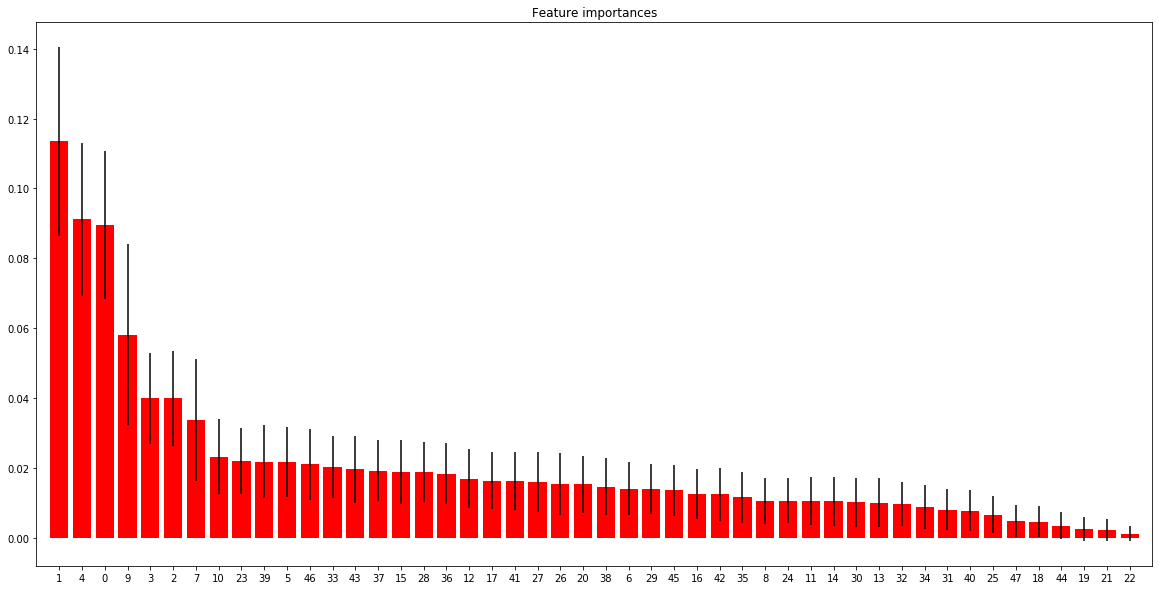

In [20]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

rfcl.fit(X, y)
importances = rfcl.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfcl.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [22]:
# Use below values
num_folds = 10
seed = 77

In [23]:
#Validate the Random Forest model build above using k fold
kf = KFold(n_splits=10,random_state=seed)
kf.get_n_splits(X)

10

In [24]:
print(kf)

KFold(n_splits=10, random_state=77, shuffle=False)


In [25]:
kscore=cross_val_score(rfcl,X_train,y_train,cv=kf)

In [26]:
#Calculate Mean score
print(kscore.mean())

0.7414285714285714


In [27]:
# Calculate score standard deviation using std()
print(kscore.std())

0.04063275043807969


# Q8 Print the confusion matrix( 1 Marks)

In [28]:
y_pred = cross_val_predict(rfcl,X_train,y_train,cv=kf)
print("The Confusion Matrix is : \n",confusion_matrix(y_train,y_pred))

The Confusion Matrix is : 
 [[441  42]
 [139  78]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

In [33]:
Recall_defaulter=441/(441+42)
print(Recall_defaulter)

Recall_nondefaulter=78/(139+78)
print(Recall_nondefaulter)

0.9130434782608695
0.35944700460829493


In [34]:
Precision_defaulter=441/(441+139)
print(Precision_defaulter)

Precision_nondefaulter=78/(78+42)
print(Precision_nondefaulter)

0.7603448275862069
0.65


[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [31]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [32]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

NameError: name 'rfm' is not defined

In [ ]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())